In [141]:
import pandas as pd
import numpy as np

In [142]:
file_path = '../../data/TSLA/RawData/extended_intraday_TSLA_1min_year1month10_adjusted.csv'

In [143]:
data = pd.read_csv(file_path)

In [144]:
time_col = pd.DatetimeIndex(data.time).tz_localize('US/Eastern')
data.time = time_col
data.set_index('time', inplace = True)

In [145]:
data.head()

,open,high,low,close,volume
time,,,,,
2020-04-23 20:00:00-04:00,139.550,139.552,139.384,139.384,8430
2020-04-23 19:59:00-04:00,139.470,139.500,139.470,139.500,3595
2020-04-23 19:58:00-04:00,139.212,139.288,139.212,139.288,8910
2020-04-23 19:57:00-04:00,139.208,139.300,139.200,139.200,5495
2020-04-23 19:56:00-04:00,139.500,139.500,139.206,139.206,10910


High-Low within the minute bar

In [146]:
data['Day_Perc_Change'] = data['close'].pct_change(periods=1)*100
data.dropna(axis=0, inplace=True)
data.head()

,open,high,low,close,volume,Day_Perc_Change
time,,,,,,
2020-04-23 19:59:00-04:00,139.470,139.500,139.470,139.500,3595,0.083223
2020-04-23 19:58:00-04:00,139.212,139.288,139.212,139.288,8910,-0.151971
2020-04-23 19:57:00-04:00,139.208,139.300,139.200,139.200,5495,-0.063178
2020-04-23 19:56:00-04:00,139.500,139.500,139.206,139.206,10910,0.004310
2020-04-23 19:54:00-04:00,139.560,139.560,139.560,139.560,995,0.254299


<AxesSubplot:xlabel='time'>

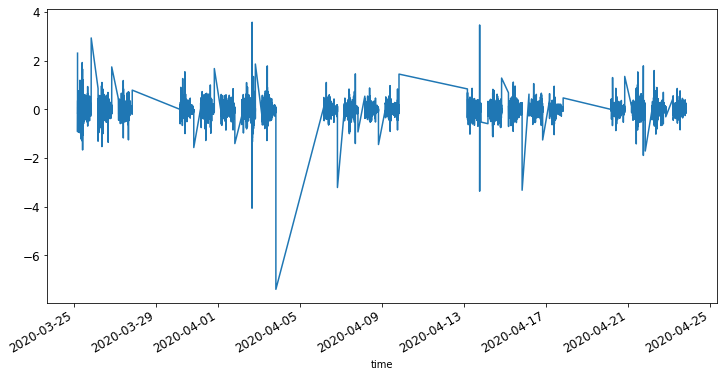

In [147]:
data['Day_Perc_Change'].plot(figsize = (12, 6), fontsize = 12)

Volitility Analysis
* Applying a rolling mean window of size 5

In [148]:
vol = data['close'].rolling(5).mean()#std()*np.sqrt(5)

In [149]:
data = data.assign(Volatility=vol)

<AxesSubplot:xlabel='time'>

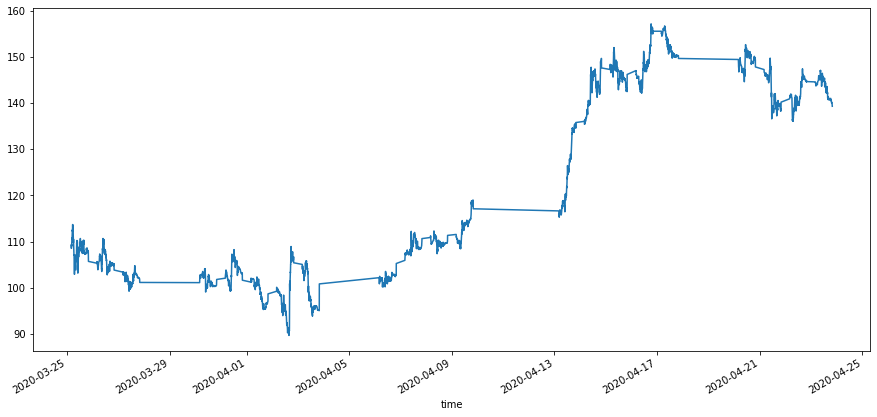

In [150]:
data.Volatility.plot(figsize=(15,7))

In [151]:
data.reset_index(inplace=True)

In [152]:
data.shape

(15567, 8)

Filter out data to use volatility on data an hour prior to market open
* Market Open: NYSE open Monday-Friday 9:30am to 4pm. Eastern time.

In [153]:
data = data.loc[data.time.apply(lambda date:(date.time()<=datetime.time(hour=9, minute=30))
                        and (date.time()>=datetime.time(hour=8, minute=30))
                        )]

In [154]:
data = data.set_index('time')

In [155]:
data.head()

,open,high,low,close,volume,Day_Perc_Change,Volatility
time,,,,,,,
2020-04-23 09:30:00-04:00,145.25600,145.37400,145.25600,145.37400,43270,-0.151791,145.039104
2020-04-23 09:29:00-04:00,146.33800,146.33800,145.20000,145.20000,45200,-0.119691,145.070604
2020-04-23 09:24:00-04:00,146.44992,146.44992,146.44992,146.44992,3720,0.860826,145.464984
2020-04-23 09:23:00-04:00,146.36000,146.45000,146.34200,146.45000,19410,0.000055,145.813784
2020-04-23 09:22:00-04:00,146.30000,146.30000,146.30000,146.30000,3600,-0.102424,145.954784


In [156]:
# data.to_csv('data.csv')

In [157]:
data.to_csv('data_vol.csv')